In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sys

In [2]:
import statsmodels.api as sm

In [38]:
def data_loader():
    path_df = sys.path[0]+'/EOS-BTC-Binance.csv'
    df = pd.read_csv(path_df)#, skiprows=1) 
    #index_col=['date'])#, parse_dates=['date'])
    #df.sort_values(by=['time'], inplace=True, ascending=True)
    #df.rename({'Volume USD': 'volume'}, axis=1, inplace=True)
    return(df)
df = data_loader()

In [39]:
df

,date,time,symbol,open,high,low,close,Volume EOS,Volume BTC,tradecount
0,1615852800000,2021-03-16 00:00:00,EOS/BTC,0.000069,0.000069,0.000069,0.000069,21863.05,1.501624,317
1,1615766400000,2021-03-15 00:00:00,EOS/BTC,0.000067,0.000069,0.000065,0.000069,4971908.73,334.720452,27538
2,1615680000000,2021-03-14 00:00:00,EOS/BTC,0.000070,0.000072,0.000067,0.000067,3455669.25,236.825335,22549
3,1615593600000,2021-03-13 00:00:00,EOS/BTC,0.000066,0.000072,0.000065,0.000070,4475482.78,304.383043,27466
4,1615507200000,2021-03-12 00:00:00,EOS/BTC,0.000069,0.000070,0.000066,0.000066,4433265.61,300.109028,23628
...,...,...,...,...,...,...,...,...,...,...
98,1607385600000,2020-12-08 00:00:00,EOS/BTC,0.000154,0.000154,0.000150,0.000153,1935977.94,294.488800,10991
99,1607299200000,2020-12-07 00:00:00,EOS/BTC,0.000155,0.000156,0.000153,0.000154,1234626.51,190.720442,8907
100,1607212800000,2020-12-06 00:00:00,EOS/BTC,0.000157,0.000158,0.000154,0.000155,963162.44,149.248616,7738
101,1607126400000,2020-12-05 00:00:00,EOS/BTC,0.000153,0.000157,0.000152,0.000157,1600804.67,246.738748,9982


In [40]:
df.head()

,date,time,symbol,open,high,low,close,Volume EOS,Volume BTC,tradecount
0,1615852800000,2021-03-16 00:00:00,EOS/BTC,0.000069,0.000069,0.000069,0.000069,21863.05,1.501624,317
1,1615766400000,2021-03-15 00:00:00,EOS/BTC,0.000067,0.000069,0.000065,0.000069,4971908.73,334.720452,27538
2,1615680000000,2021-03-14 00:00:00,EOS/BTC,0.000070,0.000072,0.000067,0.000067,3455669.25,236.825335,22549
3,1615593600000,2021-03-13 00:00:00,EOS/BTC,0.000066,0.000072,0.000065,0.000070,4475482.78,304.383043,27466
4,1615507200000,2021-03-12 00:00:00,EOS/BTC,0.000069,0.000070,0.000066,0.000066,4433265.61,300.109028,23628


## Hodrick-Prescott filter with Statsmodels
The Hodrick-Prescott filter separates a time-series  y_t  into a trend  τ_t and a cyclical component  ζt

$y_t = \tau_t + \zeta_t$

The components are determined by minimizing the following quadratic loss function

$\min_{\\{ \tau_{t}\\} }\sum_{t}^{T}\zeta_{t}^{2}+\lambda\sum_{t=1}^{T}\left[\left(\tau_{t}-\tau_{t-1}\right)-\left(\tau_{t-1}-\tau_{t-2}\right)\right]^{2}$

In [41]:
data_cycle, data_trend = sm.tsa.filters.hpfilter(df['close'])

# Price decomposition

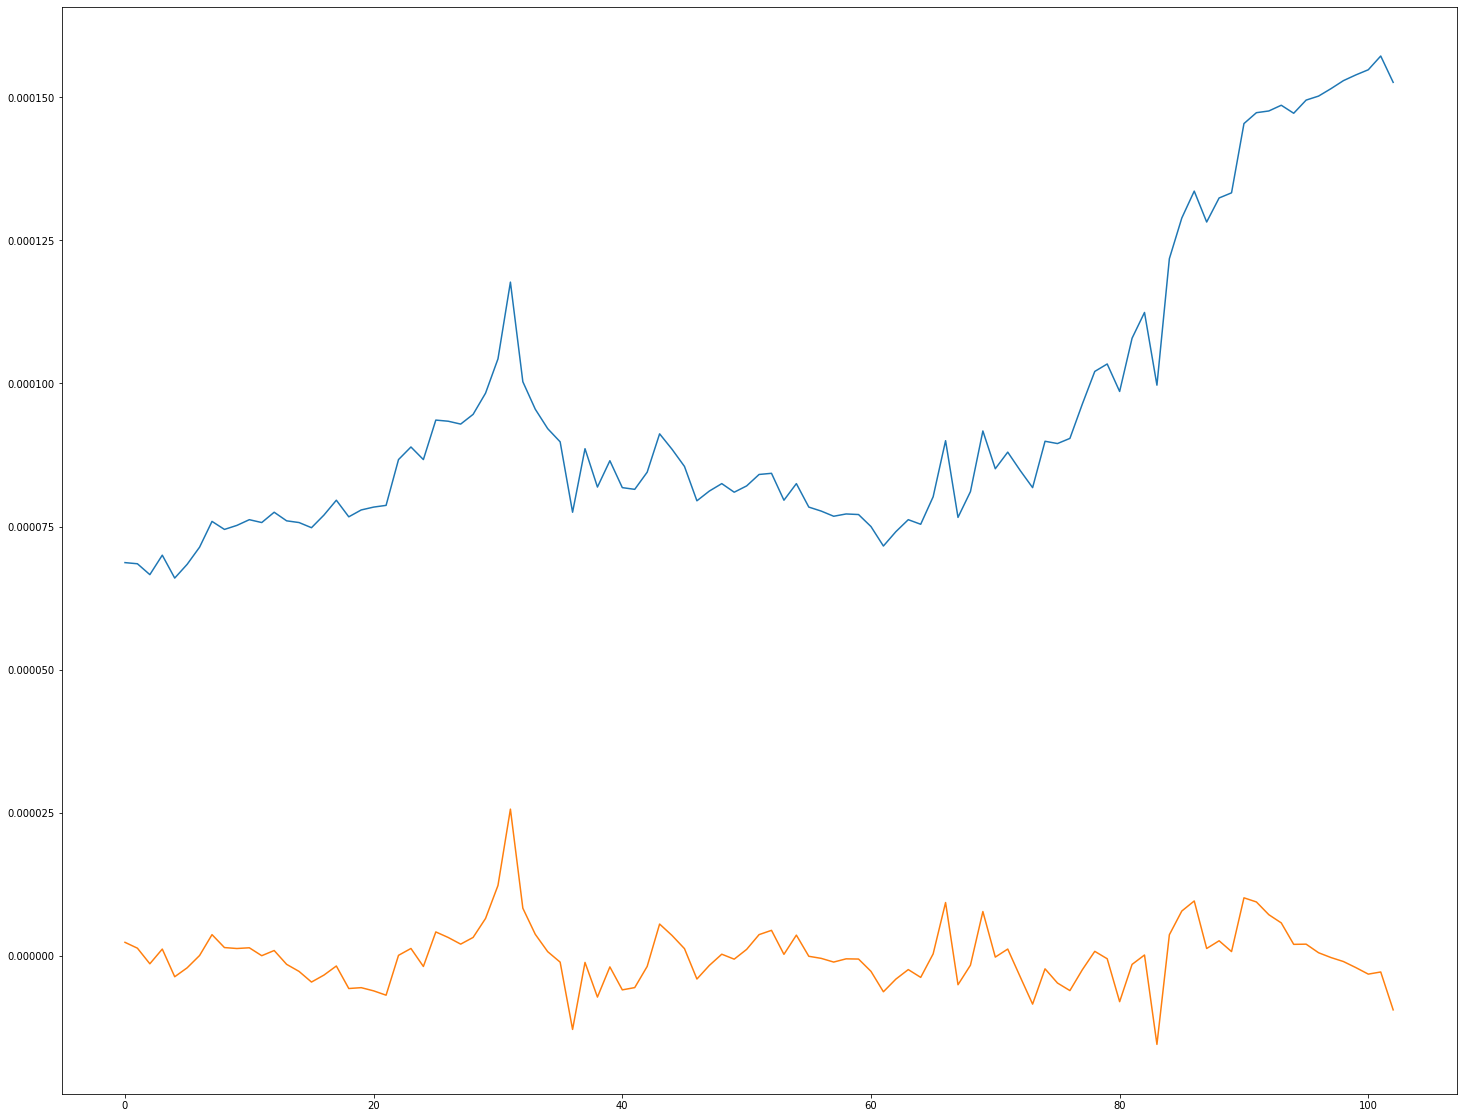

In [50]:
#df['close'].plot(figsize=(25,20))
#plt.ylabel("ETH vs USD")
plt.figure(figsize=(25,20))
plt.plot(df['close'])


plt.plot(data_cycle)


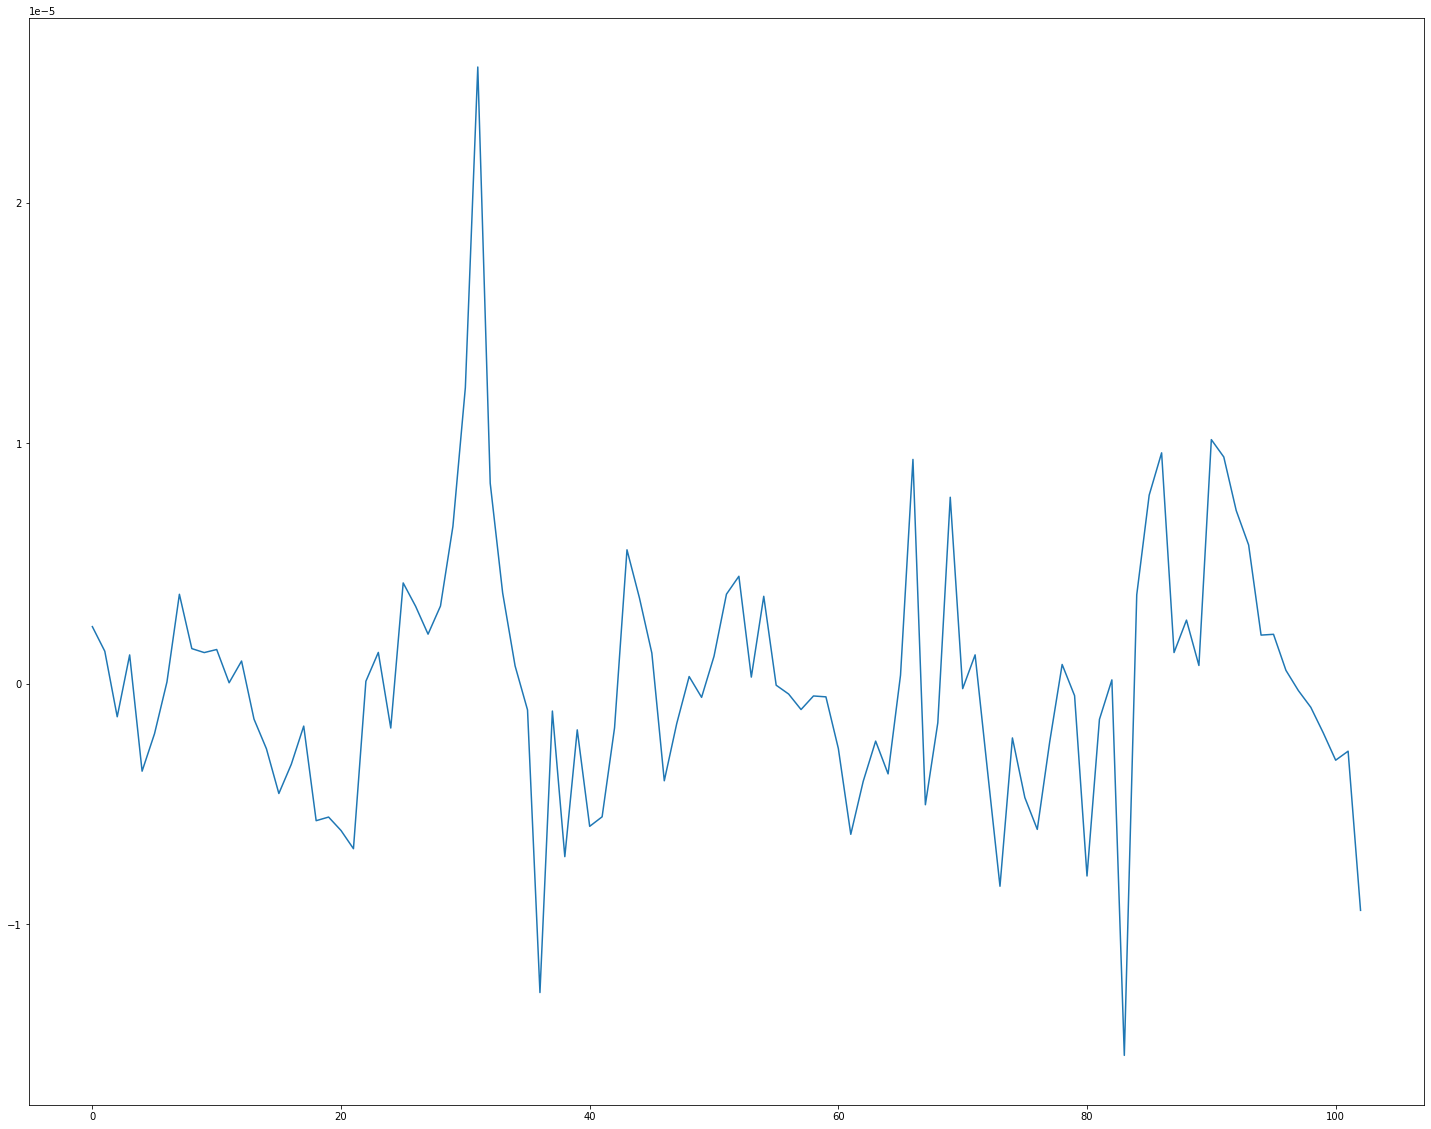

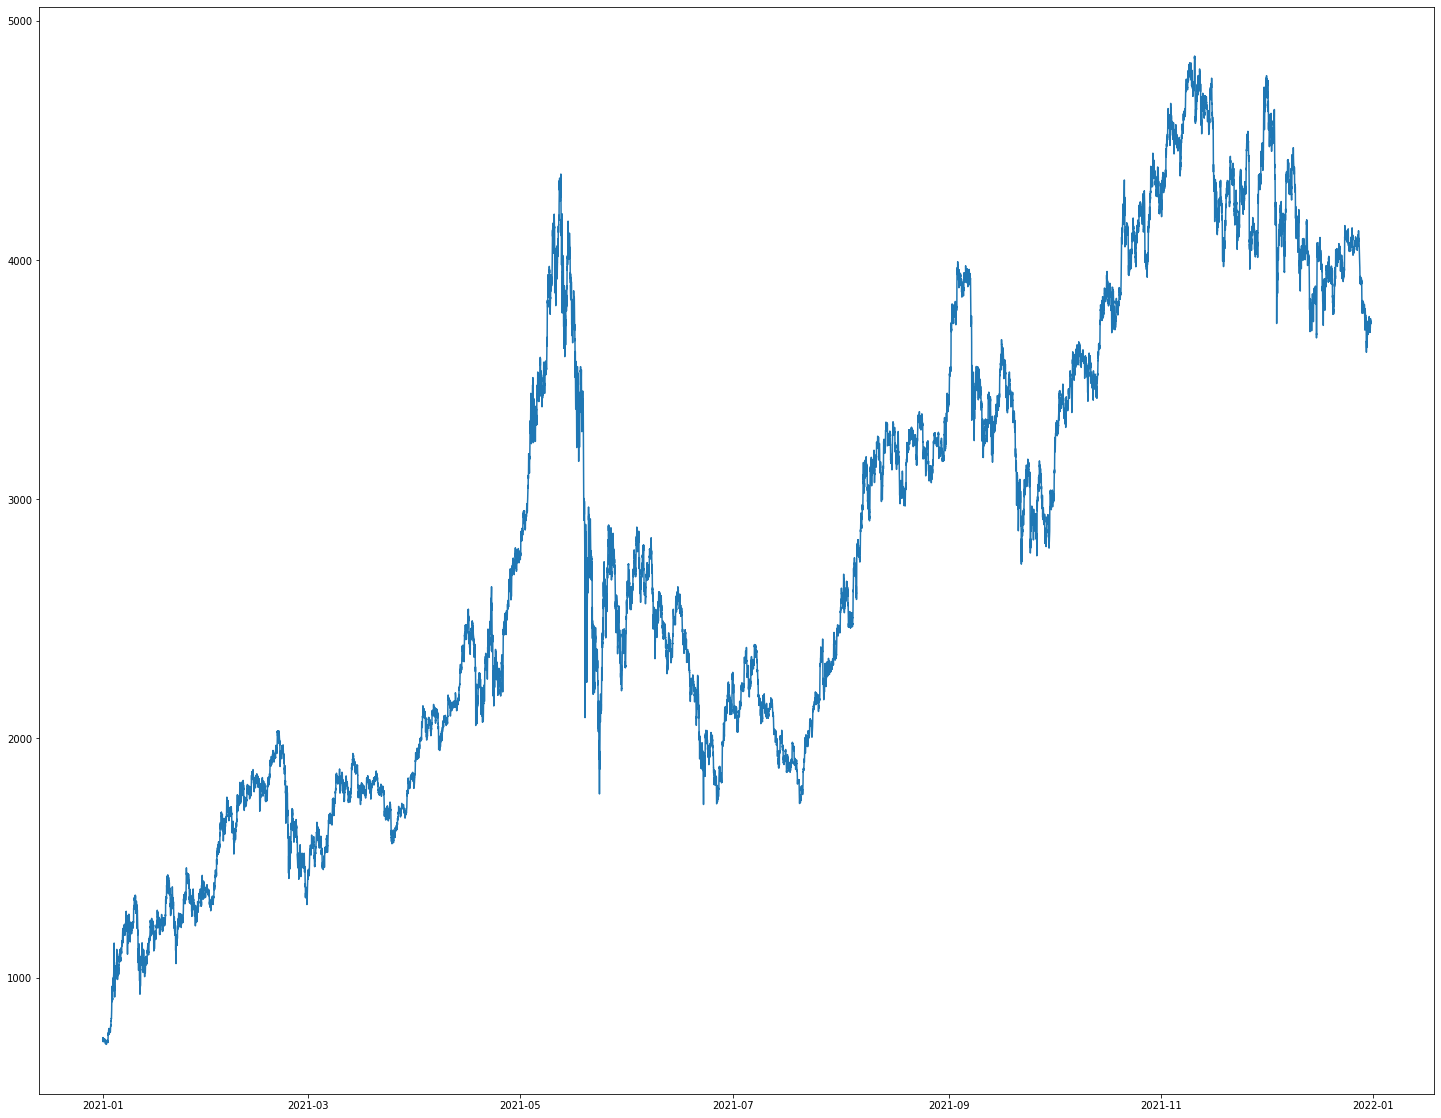

In [9]:
plt.figure(figsize=(25,20))
plt.plot(data_trend)

In [10]:
df["trend"] = data_trend

<AxesSubplot:xlabel='date'>

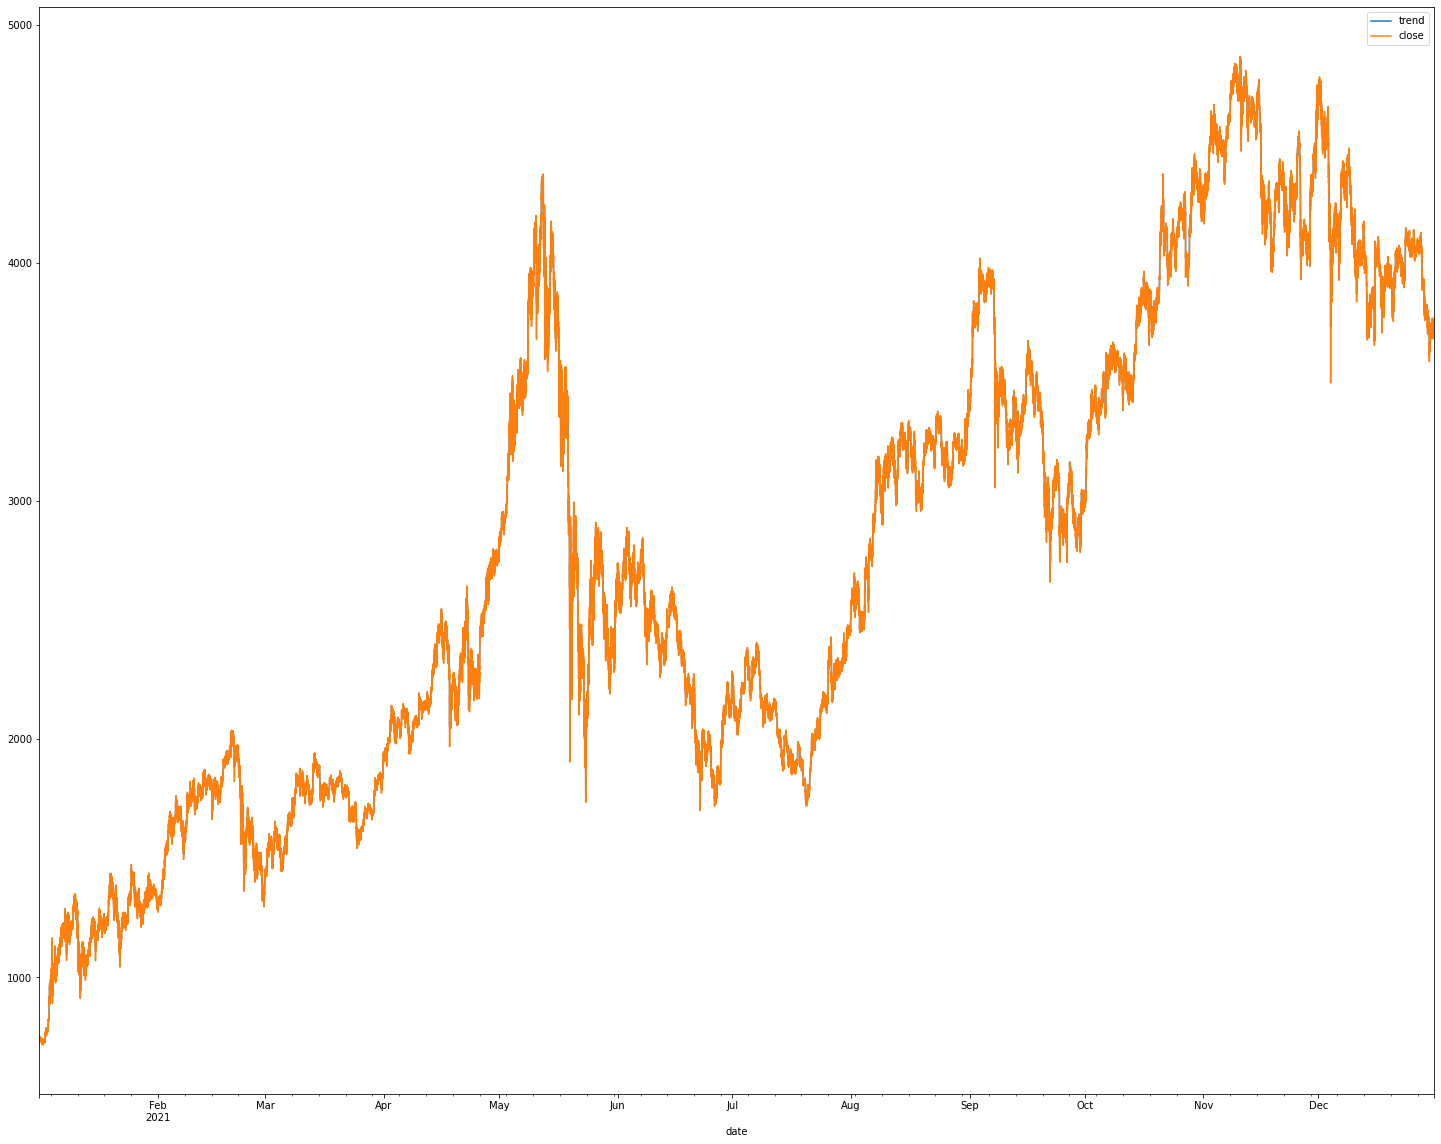

In [11]:
df[['trend','close']].plot(figsize=(25, 20))

## Volume decomposition

In [12]:
data_cycle, data_trend = sm.tsa.filters.hpfilter(df['volume'])

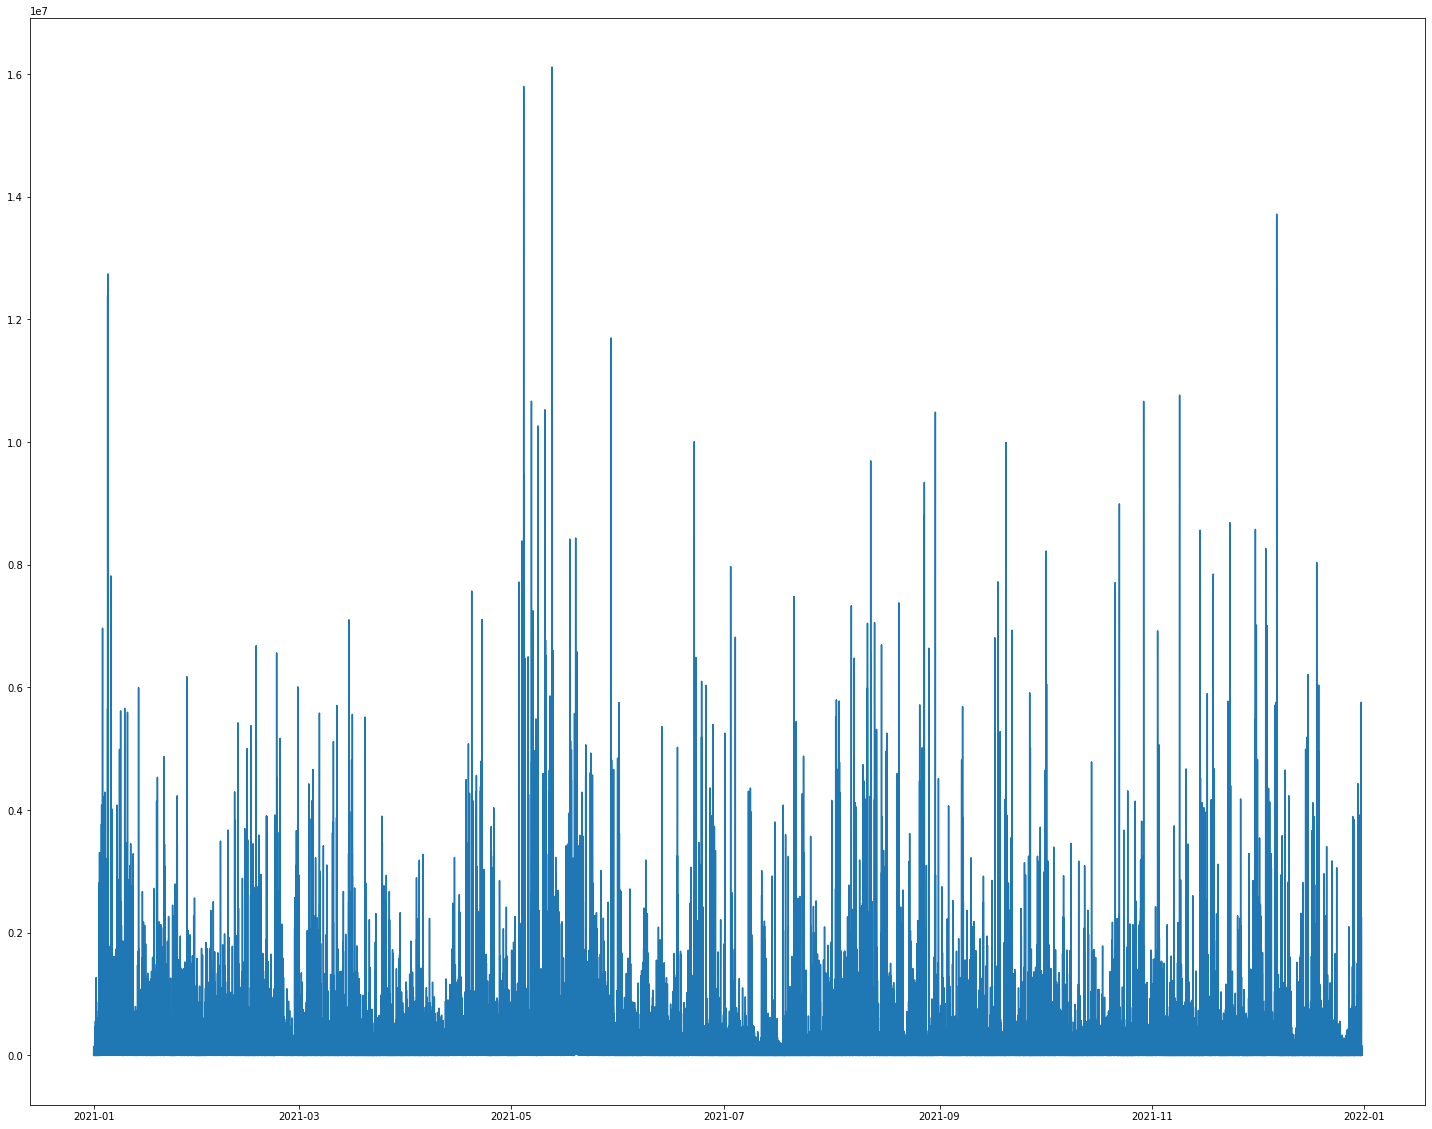

In [13]:
plt.figure(figsize=(25,20))
plt.plot(df['volume'])

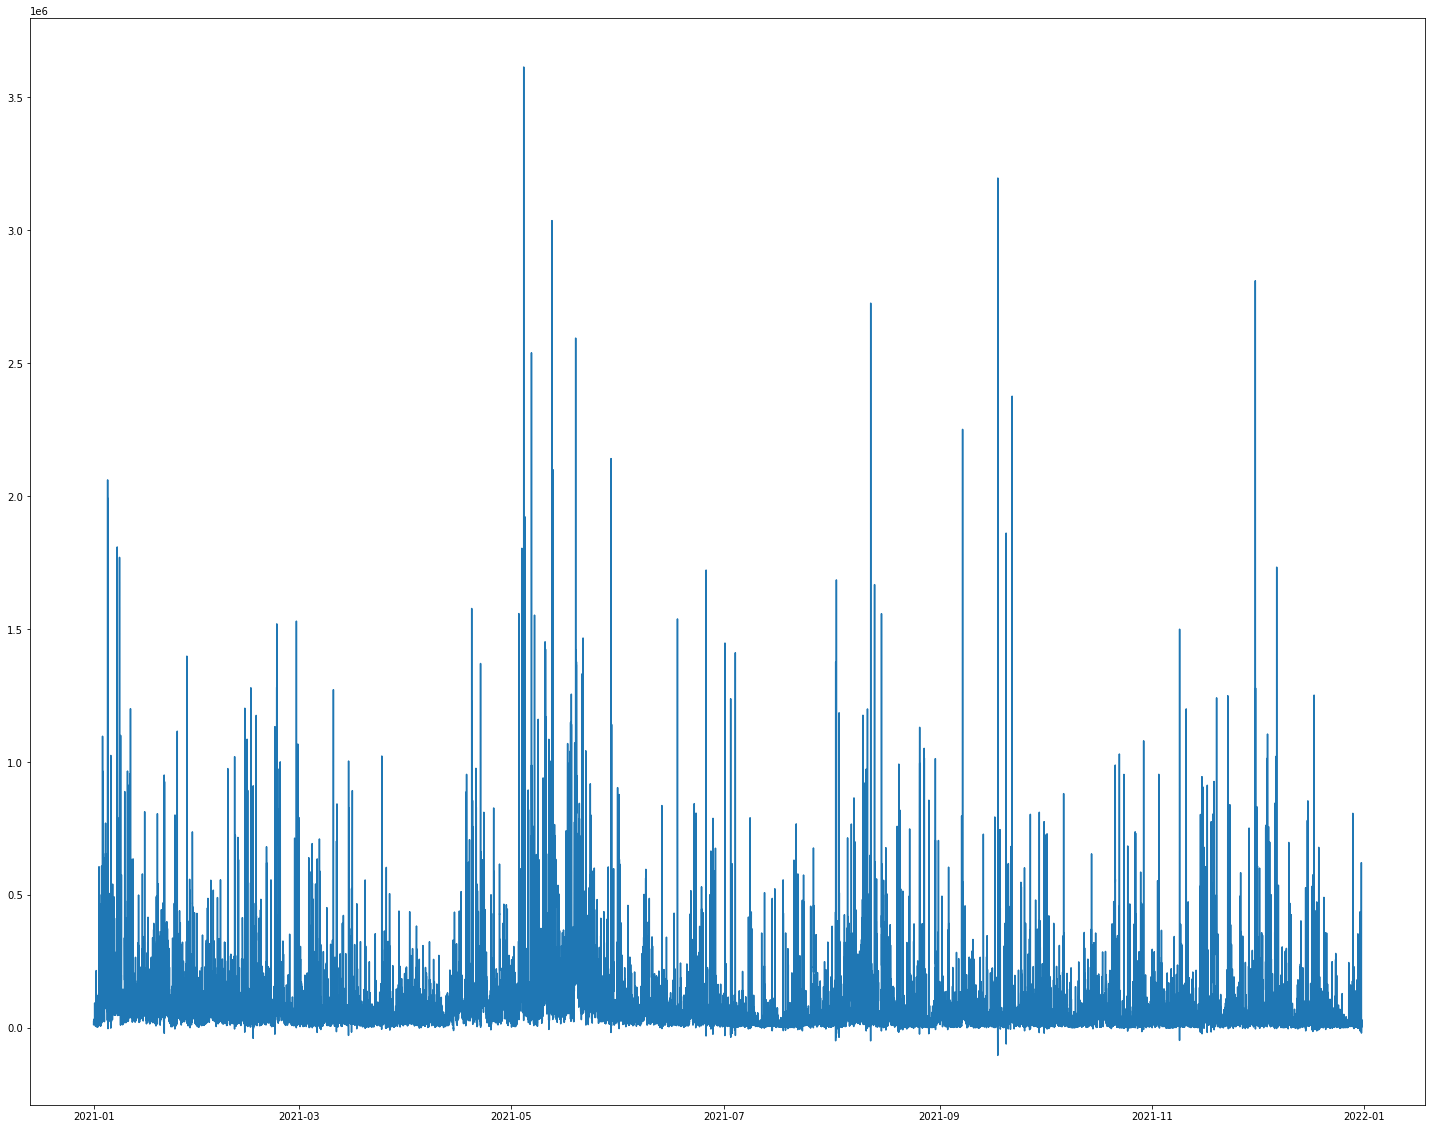

In [14]:
plt.figure(figsize=(25,20))
plt.plot(data_trend)

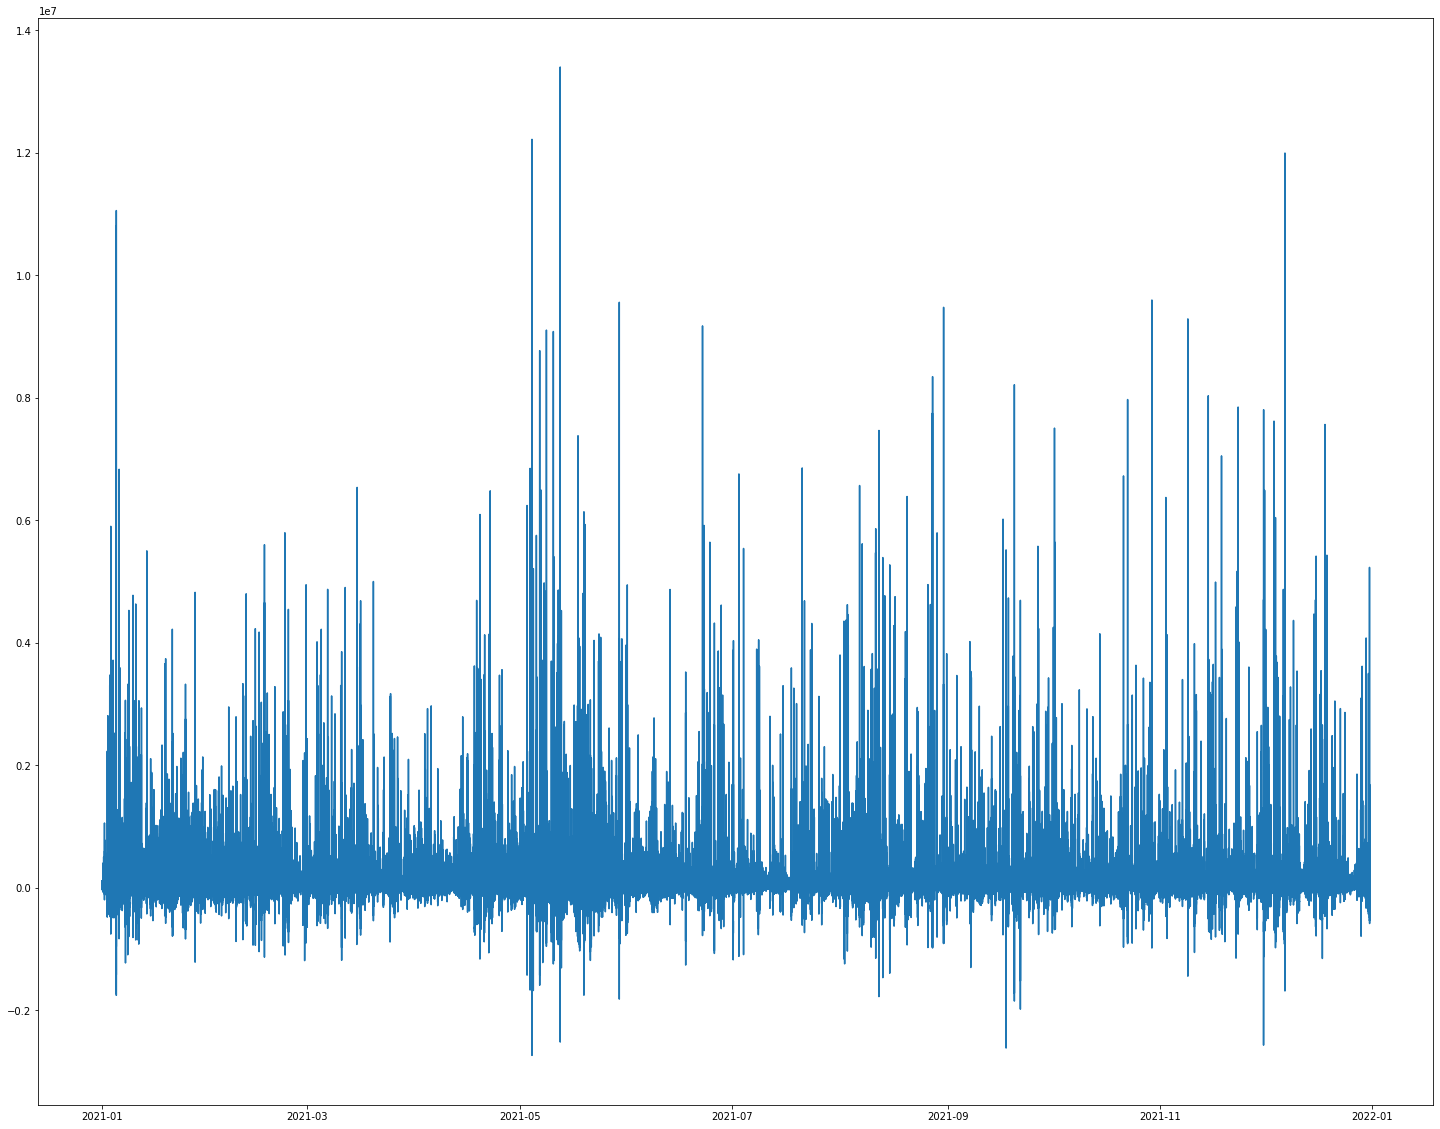

In [15]:
plt.figure(figsize=(25,20))
plt.plot(data_cycle)